The function $ f(x)=ln⁡(x^2+4) $ is given. 

We have 4 equidistant nodes in the interval $ [0.1, 0.4] $.

Construct the Lagrange interpolation polynomial.

Find the value of the interpolating polynomial for $ x = 0.25 $ and compare it to $ f(0.25) $ by finding the _**absolute**_ error (by absolute value).

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math

In [2]:
nodes = np.linspace(0.1, 0.4, 4)

n = nodes.size

In [3]:
def f(x):
    return np.log(x ** 2 + 4)

def kth_lagrange_poly(nodes, x, k):
    return math.prod((x - nodes[i]) / (nodes[k] - nodes[i]) if i != k else 1 for i in range(n))

def lagrange_poly(nodes, f, x):
    return sum(f(nodes[k]) * kth_lagrange_poly(nodes, x, k) for k in range(n))

In [4]:
x = 0.25

real_value = f(x)
approx_value = lagrange_poly(nodes, f, x)
error = abs(real_value - approx_value)
print(f'f({x}) is', real_value)
print(f'L3(f; {x}) is', approx_value)
print('Absolute error (by absolute value) is', error)

f(0.25) is 1.4017985476558559
L3(f; 0.25) is 1.401800040166142
Absolute error (by absolute value) is 1.492510286027482e-06


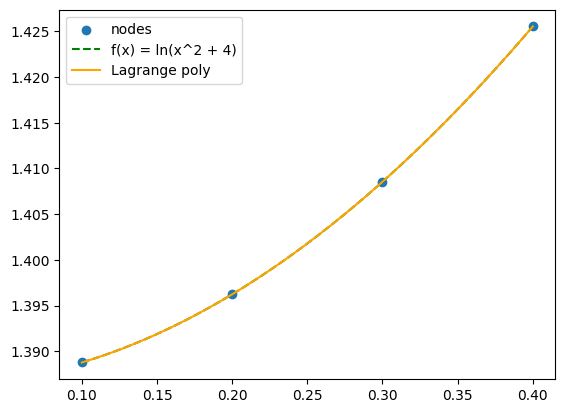

In [5]:
x_axis = np.linspace(nodes.min(), nodes.max(), 300)

plt.scatter(nodes, f(nodes))
plt.plot(x_axis, f(x_axis), color='green', linestyle='dashed')
plt.plot(x_axis, lagrange_poly(nodes, f, x_axis), color='orange')
plt.legend(['nodes', 'f(x) = ln(x^2 + 4)', 'Lagrange poly'])
plt.show()